In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize( (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) )])

In [9]:
download_path = "../prototype/pytorch_prototype/data"

trainset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=True,
    download=True,
    transform=transform)

testset = torchvision.datasets.CIFAR10(
    root=download_path,
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [26]:
batch_size = 5

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2)

In [11]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [27]:
trainiter = iter(trainloader)
testiter = iter(testloader)

In [13]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [28]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 第二引数は，スタート位置で，0なのでenumerate(trainloader)と同じ
        # https://docs.python.org/3/library/functions.html#enumerate

        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.193
[1,  4000] loss: 1.180
[1,  6000] loss: 1.200
[1,  8000] loss: 1.176
[1, 10000] loss: 1.156
[2,  2000] loss: 1.086
[2,  4000] loss: 1.095
[2,  6000] loss: 1.100
[2,  8000] loss: 1.083
[2, 10000] loss: 1.077
Finished Training


In [107]:
import matplotlib.pyplot as plt
import numpy as np

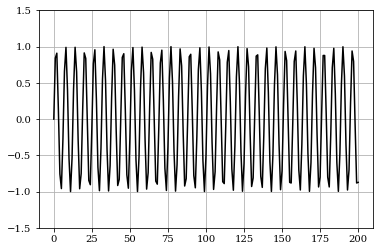

In [109]:
x = np.arange(0, 2 * 100 + 1)
f = np.sin(x)

plt.rc('font', family='serif')
plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(f, color='black')
plt.grid()
plt.show()

In [111]:
list(range(20))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]